# Dijkstra’s Algorithm - shortest route

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math

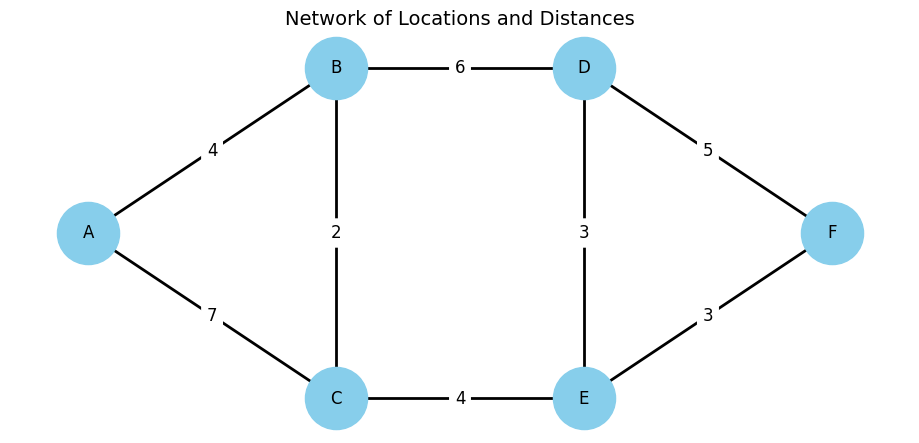

In [4]:
edges = [
    ('A', 'B', 4),
    ('A', 'C', 7),
    ('B', 'C', 2),
    ('B', 'D', 6),
    ('C', 'E', 4),
    ('D', 'E', 3),
    ('D', 'F', 5),
    ('E', 'F', 3),
]

G = nx.Graph()
G.add_weighted_edges_from(edges)

pos = {
    'A': (0, 0),
    'B': (1, 1),
    'C': (1, -1),
    'D': (2, 1),
    'E': (2, -1),
    'F': (3, 0),
}

node_color = 'skyblue'
edge_color = 'black'

plt.figure(figsize=(9, 4))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_color,
    edge_color=edge_color,
    node_size=2000,
    font_size=12,
    width=2
)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=12,
    rotate=False
)

plt.title("Network of Locations and Distances", fontsize=14)
plt.axis("off")
plt.show()


## Extracting shortest distance between A to other points 

1. Iterative algorithm - in each iteration the distnaces between A to the other points is updated
2. We start with the direct distance between A to B and C

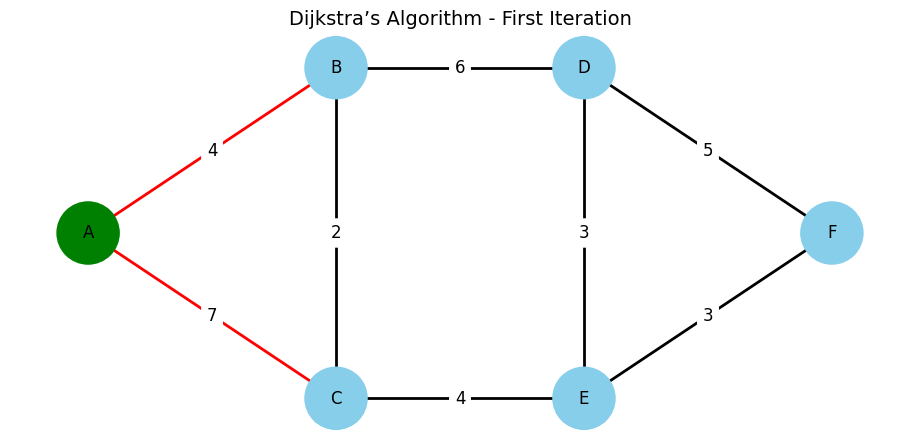

In [5]:
node_colors = ['green' if n == 'A' else 'skyblue' for n in G.nodes()]

# Edge colors: edges connected to A in red, others black
edge_colors = []
for u, v in G.edges():
    if 'A' in (u, v):
        edge_colors.append('red')
    else:
        edge_colors.append('black')

# Draw graph
plt.figure(figsize=(9, 4))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=2000,
    font_size=12,
    width=2
)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=12,
    rotate=False
)

plt.title("Dijkstra’s Algorithm - First Iteration", fontsize=14)
plt.axis("off")
plt.show()


In [6]:
data = [
    {"Node": "A", "Distance from A": 0, "Previous Node": None},
    {"Node": "B", "Distance from A": 4, "Previous Node": "A"},
    {"Node": "C", "Distance from A": 7, "Previous Node": "A"},
    {"Node": "D", "Distance from A": None,"Previous Node": None},
    {"Node": "E", "Distance from A": None, "Previous Node": None},
    {"Node": "F", "Distance from A": None, "Previous Node": None},
]

df = pd.DataFrame(data)
print(df)

  Node  Distance from A Previous Node
0    A              0.0          None
1    B              4.0             A
2    C              7.0             A
3    D              NaN          None
4    E              NaN          None
5    F              NaN          None


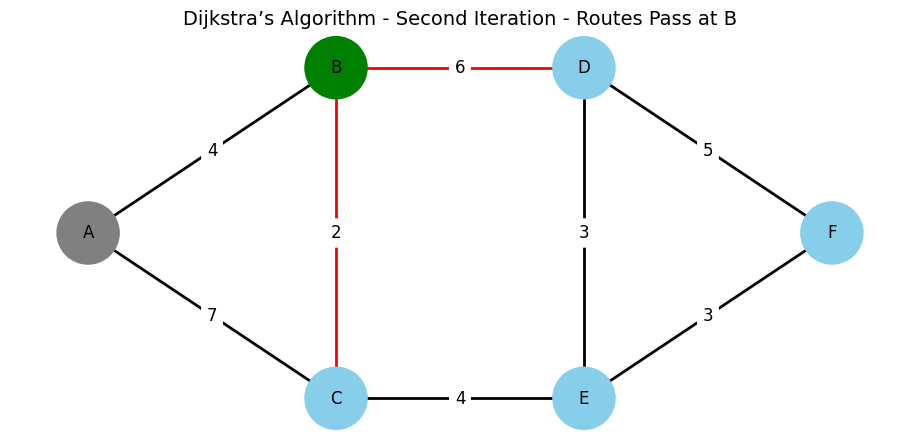

In [7]:
node_colors = []
for n in G.nodes():
    if n == 'A':
        node_colors.append('gray')
    elif n == 'B':
        node_colors.append('green')
    else:
        node_colors.append('skyblue')

edge_colors = []
for u, v in G.edges():
    if (u == 'B' and v in ['C', 'D']) or (v == 'B' and u in ['C', 'D']):
        edge_colors.append('red')
    else:
        edge_colors.append('black')

plt.figure(figsize=(9, 4))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=2000,
    font_size=12,
    width=2
)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=12,
    rotate=False
)

plt.title("Dijkstra’s Algorithm - Second Iteration - Routes Pass at B", fontsize=14)
plt.axis("off")
plt.show()


In [8]:
data = [
    {"Node": "A", "Distance from A": 0, "Previous Node": None},
    {"Node": "B", "Distance from A": 4, "Previous Node": "A"},
    {"Node": "C", "Distance from A": 6, "Previous Node": "B"},
    {"Node": "D", "Distance from A": None,"Previous Node": None},
    {"Node": "E", "Distance from A": None, "Previous Node": None},
    {"Node": "F", "Distance from A": None, "Previous Node": None},
]

df = pd.DataFrame(data)
print(df)

  Node  Distance from A Previous Node
0    A              0.0          None
1    B              4.0             A
2    C              6.0             B
3    D              NaN          None
4    E              NaN          None
5    F              NaN          None


# Final table for point A

In [9]:
distances, paths = nx.single_source_dijkstra(G, source='A', weight='weight')

results = []
for node in G.nodes():
    if node == 'A':
        prev_node = '-'
    else:
        path_to_node = paths[node]
        prev_node = path_to_node[-2] if len(path_to_node) > 1 else '-'
    
    results.append({
        'Node': node,
        'Distance from A': distances[node],
        'Previous Node': prev_node
    })

df = pd.DataFrame(results).sort_values('Node')
print(df.to_string(index=False))

Node  Distance from A Previous Node
   A                0             -
   B                4             A
   C                6             B
   D               10             B
   E               10             C
   F               13             E
